In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dmrs = pd.read_csv('../../data/dmrs_march_outs.tsv', sep='\t')

In [3]:
annots = pd.read_csv('../../data/outs/dmrs_annotated.tsv', sep='\t')

In [4]:
dmrs = dmrs.set_index("3")

In [5]:
annots = annots.set_index('PeakID (cmd=annotatePeaks.pl ../../data/ref/dmr_bed.bed hg38)')

In [6]:
annots = annots.reindex(dmrs.index)

In [7]:
dmrs['homer_annot'] = annots['Detailed Annotation']
dmrs['TSS_dist'] = annots['Distance to TSS']
dmrs['gene_name'] = annots['Gene Name']

In [8]:
def simplify_annotation(annot_string):
    if 'exon' in annot_string:
        return 'exon'
    if 'promoter' in annot_string:
        return 'promoter'
    if 'intron' in annot_string:
        return 'intron'
    if 'Intergenic' in annot_string:
        return 'Intergenic'
    if 'TTS' in annot_string:
        return 'TTS'
    if 'CpG' in annot_string:
        return 'CpG'
    if '?' in annot_string:
        # return 'uncertain'
        return annot_string.split('|')[2].strip('?')
    if annot_string.count('|') == 2:
        return annot_string.split('|')[2]
    return annot_string

In [9]:
def annotate_tes(annot_string):
#     if 'HERV' in annot_string:
#         return 'HERV'
    if 'LTR' in annot_string:
        return 'LTR'
    if 'LINE' in annot_string:
        return 'LINE'
    if 'SINE' in annot_string:
        return 'SINE'
    if 'DNA' in annot_string:
        return 'DNA'
    else:
        return 'not_te'
    return annot_string

In [10]:
simple_annot = [simplify_annotation(i) for i in dmrs['homer_annot']]

In [11]:
te_annot = [annotate_tes(i) for i in dmrs['homer_annot']]

In [12]:
dmrs['simple_annot'] = simple_annot
dmrs['te_annot'] = te_annot

In [13]:
(dmrs['te_annot']=='SINE').sum()

128651

# get plot DF for dmr levels

In [14]:
order_names = ['1_LTR', '2_LINE', '3_SINE', '4_DNA']
order_rename = {i.split('_')[1] : i for i in order_names}

In [15]:
import sys
sys.path.insert(0, '../../scripts/')
from common_funcs import read_list

In [16]:
mammal_level3 = read_list('/home/ethan/work/projects/mammalian_motor_cortex_comparative/fig2/data/outputs/final/dmrs/all_conserved.txt')

In [17]:
dmrs['mammal_level3'] = dmrs.index.isin(mammal_level3)

In [18]:
levels = { 'all' : 'all',
          'Specific' : 'human_specific', 
          'level0': 'mammal_level0',
          'level1' : 'mammal_level1', 'level2' : 'mammal_level2',
          'level3': 'mammal_level3'}

In [19]:
dfs = []
for level_name, level in levels.items():
    if level == 'all':
        use_dmr = dmrs
    else:
        use_dmr = dmrs.loc[dmrs[level]]
    n_te = {name : [level_name, (use_dmr.te_annot == te_class).sum()/use_dmr.shape[0] * 100] for te_class, name in order_rename.items()}
    df = pd.DataFrame(n_te).T.reset_index()
    df.columns = ['annotation', 'group', 'peaks']
    dfs.append(df)

In [20]:
dfs = pd.concat(dfs)

In [21]:
dfs.to_csv('../../data/tes/te_melt.txt', sep='\t', index=False)

# get dmr cell by cell type

In [22]:
import pandas as pd
import numpy as np

In [23]:
hyper_assign = pd.read_csv('../../data/outs/human_cell_type_hyper_dmr_info.tsv', sep='\t').set_index('dmr_name') #.reindex(dmrs.index)

In [24]:
hypo_assign = pd.read_csv('../../data/outs/human_cell_type_hypo_dmr_info.tsv', sep='\t').set_index('dmr_name') #.reindex(dmrs.index)

In [25]:
cell_types = hyper_assign.columns

In [26]:
cell_types = cell_types[:-1]

In [27]:
te_locs = dmrs.te_annot != 'not_te'

In [28]:
annot_groups = np.unique(dmrs.loc[te_locs, 'te_annot'] + '_' + dmrs.loc[te_locs, 'simple_annot'])
annot_groups = {i.split('_')[1] : i.split('_')[0] for i in annot_groups}

In [29]:
te_colors = {'DNA' : '#5E3C99', 
             'SINE' : '#B2ABD2',
             'LINE' : '#FDB863',
             'LTR' : '#E66101'}

In [30]:
te_types = ['ERVL','ERVL-MaLR','ERV1',
'ERVK','Gypsy','LTR','L1','L2','CR1','RTE-BovB','RTE-X','Dong-R4','Penelope','Alu',
'MIR','tRNA-RTE','tRNA','5S-Deu-L2','tRNA-Deu','hAT-Charlie','TcMar-Tigger',
'hAT-Tip100','hAT-Blackjack','DNA','hAT-Ac','TcMar-Tc2','TcMar-Mariner',
'hAT','PiggyBac','MULE-MuDR','Merlin','hAT-Tag1','TcMar']

In [31]:
cell_order = ['Vip','Sncg', 'Lamp5',  'Sst','Pvalb-BC', 'Pvalb-ChC',  'L23', 'L4', 'L5-IT', 'L6-IT',  'CLA', 'L5-ET', 'NP', 'L6-CT',  'L6b',
       'Vsc', 'MG',  'ODC', 'OPC', 
        'Astro',]

In [32]:
dmrs.head()

,0,1,2,mammal_level0,primate_level0,human_specific,macaque_level1,marmoset_level1,mouse_level1,mammal_level1,...,hyper_not_hypo_mammal,hyper_not_hypo_primate,mammal_level2,primate_level2,homer_annot,TSS_dist,gene_name,simple_annot,te_annot,mammal_level3
3,,,,,,,,,,,,,,,,,,,,,
human_orig_1,chr1,14699,14710,False,False,False,False,False,False,False,...,False,False,False,False,TTS (NR_046018),2731,MIR6859-1,TTS,not_te,False
human_orig_2,chr1,54489,54649,False,False,False,False,False,False,False,...,False,False,False,False,L2|LINE|L2,-14522,OR4F5,L2,LINE,False
human_orig_3,chr1,56298,56305,False,False,False,False,False,False,False,...,False,False,False,False,Intergenic,-12789,OR4F5,Intergenic,not_te,False
human_orig_4,chr1,87723,87754,False,False,False,False,False,False,False,...,False,False,False,False,Intergenic,18648,OR4F5,Intergenic,not_te,False
human_orig_5,chr1,91059,91550,False,False,False,False,False,False,False,...,False,False,False,False,Intergenic,22214,OR4F5,Intergenic,not_te,False


In [38]:
dmrs.columns

Index(['chr', 'start', 'end', 'mammal_level0', 'primate_level0',
       'human_specific', 'macaque_level1', 'marmoset_level1', 'mouse_level1',
       'mammal_level1', 'primate_level1', 'mammal_Astro_level2',
       'primate_Astro_level2', 'mammal_CLA_level2', 'primate_CLA_level2',
       'mammal_L23_level2', 'primate_L23_level2', 'mammal_L4_level2',
       'primate_L4_level2', 'mammal_L5-ET_level2', 'primate_L5-ET_level2',
       'mammal_L5-IT_level2', 'primate_L5-IT_level2', 'mammal_L6-CT_level2',
       'primate_L6-CT_level2', 'mammal_L6-IT_level2', 'primate_L6-IT_level2',
       'mammal_L6b_level2', 'primate_L6b_level2', 'mammal_Lamp5_level2',
       'primate_Lamp5_level2', 'mammal_MG_level2', 'primate_MG_level2',
       'mammal_NP_level2', 'primate_NP_level2', 'mammal_ODC_level2',
       'primate_ODC_level2', 'mammal_OPC_level2', 'primate_OPC_level2',
       'mammal_Pvalb-BC_level2', 'primate_Pvalb-BC_level2',
       'mammal_Pvalb-ChC_level2', 'primate_Pvalb-ChC_level2',
       'ma

In [34]:
dmrs = dmrs.rename(columns = {'0' : 'chr', '1': 'start', '2' :'end',})

In [35]:
to_drop = ['hyper_not_hypo_mammal', 'hyper_not_hypo_primate', 'homer_annot']

In [36]:
dmrs = dmrs.drop(columns =to_drop)

In [39]:
text_cols = ['chr', 'start', 'end', 'TSS_dist', 'gene_name', 'simple_annot', 'te_annot']

In [40]:
dmrs_save = dmrs.copy()

In [43]:
def update_boolean(val):
    if val:
        return 'T'
    return 'F'

In [45]:
bool_columns = dmrs_save.select_dtypes(include='bool').columns
dmrs_save[bool_columns] = dmrs_save[bool_columns].applymap(update_boolean)

In [49]:
dmrs_save.to_csv('../../../fig2/data/for_figures/dmr_summary_table.tsv', sep='\t')

In [32]:
def get_nathan_counts(ct, specific=False, norm=True):
    vals = (dmrs.loc[te_locs & 
                 hypo_assign[ct]].simple_annot.value_counts()/(hypo_assign[ct]).sum())
    if specific:
        vals = (dmrs.loc[te_locs & 
                     hypo_assign[ct] 
                     & dmrs.human_specific].simple_annot.value_counts()/(hypo_assign.loc[dmrs.human_specific, ct]).sum())
    if not norm:
          vals = (dmrs.loc[te_locs & 
                     hypo_assign[ct] ].simple_annot.value_counts())
    if not norm and specific:
        vals = (dmrs.loc[te_locs & 
                     hypo_assign[ct] 
                     & dmrs.human_specific].simple_annot.value_counts())
    vals = vals.reindex(te_types).reset_index().fillna(0)
    vals['te_class'] = [annot_groups[i] for i in vals['index']]
    vals['clust'] = ct
    vals['te_class'] = [order_rename[i] for i in vals.te_class]
    if norm:
        vals['simple_annot'] = vals['simple_annot'] * 100
    vals = vals[['simple_annot', 'index', 'te_class', 'clust']]
    return vals

In [33]:
out_path = '../../data/tes/{}_number_of_peaks_in_te.txt'
out_path_specific = '../../data/tes/human_specific/{}_number_of_peaks_in_te.txt'

In [34]:
for ct in cell_types:
    get_nathan_counts(ct).to_csv(out_path.format(ct), sep='\t', header=None, index=None)
    get_nathan_counts(ct, specific=True).to_csv(out_path_specific.format(ct), sep='\t', header=None, index=None)    

In [35]:
hypo_assign['multi_activity'] = hypo_assign[cell_types].sum(axis=1)

In [36]:
hyper_assign['multi_activity'] = hyper_assign[cell_types].sum(axis=1)

In [37]:
n=30

In [38]:
te_hyper = []
te_hypo = []
for ct in cell_types:
    te_hyper.append((dmrs[te_locs &
                          hyper_assign[ct] &
                          (hyper_assign['multi_activity'] <= n)].simple_annot.value_counts()/(hyper_assign[ct] & 
                                                                                              (hyper_assign['multi_activity'] <= n)).sum()).rename(ct))
    te_hypo.append((dmrs[te_locs &  
                         hypo_assign[ct] & 
                         (hypo_assign['multi_activity'] <= n)].simple_annot.value_counts()/(hypo_assign[ct] 
                                                                                            & (hypo_assign['multi_activity'] <= n)).sum()).rename(ct))

In [39]:
ct = 'Astro'
(dmrs[te_locs &  hypo_assign[ct]].simple_annot.value_counts()/(hypo_assign[ct]).sum())[['ERVL', 'ERVL-MaLR', 'ERV1', 'ERVK', 'Gypsy']].reset_index().head()

,index,simple_annot
0,ERVL,0.017603
1,ERVL-MaLR,0.026164
2,ERV1,0.026997
3,ERVK,0.003811
4,Gypsy,0.001634


In [40]:
ct = 'Astro'
get_nathan_counts(ct).head()

,simple_annot,index,te_class,clust
0,1.760280,ERVL,1_LTR,Astro
1,2.616401,ERVL-MaLR,1_LTR,Astro
2,2.699729,ERV1,1_LTR,Astro
3,0.381058,ERVK,1_LTR,Astro
4,0.163395,Gypsy,1_LTR,Astro


In [41]:
te_hyper=pd.concat(te_hyper, axis=1).fillna(0)
te_hypo=pd.concat(te_hypo, axis=1).fillna(0)

In [42]:
te_hyper['te_class'] = [annot_groups[i] for i in te_hyper.index]
te_hypo['te_class'] = [annot_groups[i] for i in te_hypo.index]
te_hyper = te_hyper.sort_values('te_class')
te_hypo = te_hypo.sort_values('te_class')

In [43]:
colors_hypo = [te_colors[i] for i in te_hypo.te_class]
colors_hyper = [te_colors[i] for i in te_hyper.te_class]

In [44]:
def dotplot_colors(proportion, ax=None, max_size=1000, x_names=None, y_names=None, colors=None, cbar=None):
    """
        minimal dotplot
    """
    x, y = np.indices(proportion.shape)
    y = y.flatten() + 0.5
    x = (x.flatten() + 0.5)
    size = proportion.flatten() * max_size
    
    if ax:
        im = ax.scatter(x, y, s=size, c=colors)
    else:
        fig, ax = plt.subplots()
        im = ax.scatter(x, y, s=size, c=colors)
    if x_names is not None:
        _ = ax.set_xticks(np.arange(proportion.shape[0]) + .5, labels=x_names, rotation = 90)
    if y_names is not None:
        _ = ax.set_yticks(np.arange(proportion.shape[1]) + .5, labels=y_names)
    if cbar:
        cbar = ax.figure.colorbar(im, ax=ax)
        cbar.set_label('mean log2 cpm',
                       rotation=270,
                       labelpad=10)
    return ax

In [45]:
get_nathan_counts('Astro', norm=False, specific=True)['simple_annot'].sum()

6675.0

In [46]:
(hypo_assign['Astro']).sum()

337219

In [47]:
hypo_assign.loc[dmrs.human_specific, 'Astro'].sum()

13222

In [48]:
te_hypo= te_hypo[cell_order]
te_hyper=te_hyper[cell_order]

Text(0.5, 1.0, 'proportion hypo dmrs, common to 30 or fewer cell types')

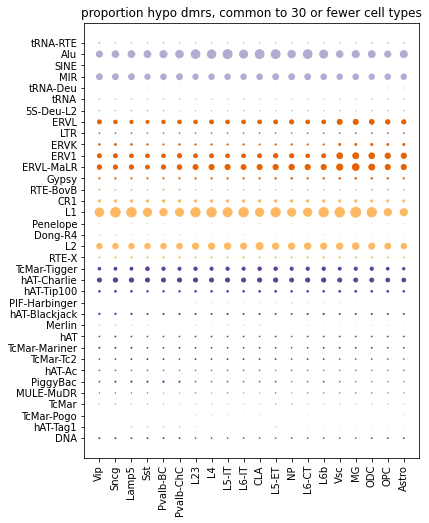

In [49]:
fig, ax = plt.subplots(figsize=(6, 8))
dotplot_colors(te_hypo.values.T,
               colors=np.array([colors_hypo]*20).flatten(),
               x_names=te_hypo.columns,
               y_names=te_hypo.index,
               max_size=1000,
               ax=ax)
ax.set_title('proportion hypo dmrs, common to {} or fewer cell types'.format(n))

Text(0.5, 1.0, 'hyper dmrs, common to 30 or fewer cell types')

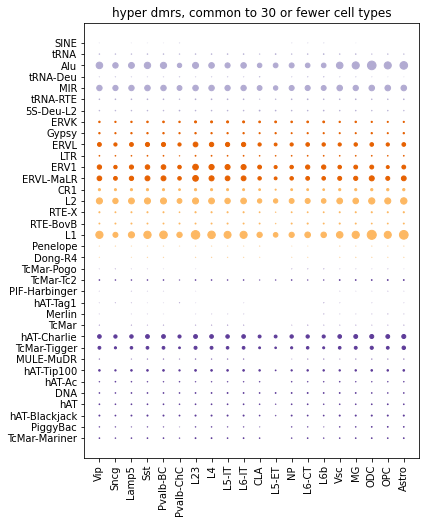

In [50]:
fig, ax = plt.subplots(figsize=(6, 8))
dotplot_colors(te_hyper.values.T,
               colors=np.array([colors_hyper]*20).flatten(),
               x_names=cell_order,
               y_names=te_hyper.index,
               ax=ax)
ax.set_title('hyper dmrs, common to {} or fewer cell types'.format(n))

In [51]:
te_hypo.max()

Vip          0.071840
Sncg         0.091232
Lamp5        0.088787
Sst          0.067229
Pvalb-BC     0.054637
Pvalb-ChC    0.063124
L23          0.085521
L4           0.087273
L5-IT        0.080799
L6-IT        0.087026
CLA          0.078857
L5-ET        0.084061
NP           0.063834
L6-CT        0.074943
L6b          0.086697
Vsc          0.091352
MG           0.097866
ODC          0.087091
OPC          0.051566
Astro        0.051272
dtype: float64

In [52]:
cell_types

Index(['Astro', 'CLA', 'L23', 'L4', 'L5-ET', 'L5-IT', 'L6-CT', 'L6-IT', 'L6b',
       'Lamp5', 'MG', 'NP', 'ODC', 'OPC', 'Pvalb-BC', 'Pvalb-ChC', 'Sncg',
       'Sst', 'Vip', 'Vsc'],
      dtype='object')

In [53]:
(hypo_assign[ct] & dmrs['human_specific'] & (hypo_assign['multi_activity'] < 3)).sum()

4089

In [54]:
n = 30

In [55]:
specific_te_hyper = []
specific_te_hypo = []
for ct in cell_types:
    specific_te_hyper.append((dmrs.loc[(te_locs &  
                                        hyper_assign.loc[(hyper_assign['multi_activity'] <= n), ct])
                                       & dmrs['human_specific']].simple_annot.value_counts()/hyper_assign.loc[((hyper_assign['multi_activity'] <= n) & dmrs['human_specific']), ct].sum()).rename(ct))
    specific_te_hypo.append((dmrs.loc[(te_locs &  
                                       hypo_assign.loc[(hypo_assign['multi_activity'] <= n), ct])
                                      & dmrs['human_specific']].simple_annot.value_counts()/hypo_assign.loc[((hypo_assign['multi_activity'] <= n) & dmrs['human_specific']), ct].sum()).rename(ct))

In [56]:
# specific_te_hyper=pd.concat(specific_te_hyper, axis=1).fillna(0)
specific_te_hypo=pd.concat(specific_te_hypo, axis=1).fillna(0)

In [57]:
# specific_te_hyper['te_class'] = [annot_groups[i] for i in specific_te_hyper.index]
specific_te_hypo['te_class'] = [annot_groups[i] for i in specific_te_hypo.index]
# specific_te_hyper = specific_te_hyper.sort_values('te_class')
specific_te_hypo = specific_te_hypo.sort_values('te_class')

In [58]:
colors_hypo = [te_colors[i] for i in specific_te_hypo.te_class]
# colors_hyper = [te_colors[i] for i in specific_te_hyper.te_class]

In [59]:
# specific_te_hyper = specific_te_hyper[cell_order]
specific_te_hypo = specific_te_hypo[cell_order]

Text(0.5, 1.0, 'human specific hypo dmrs, common to 30 or fewer cell types')

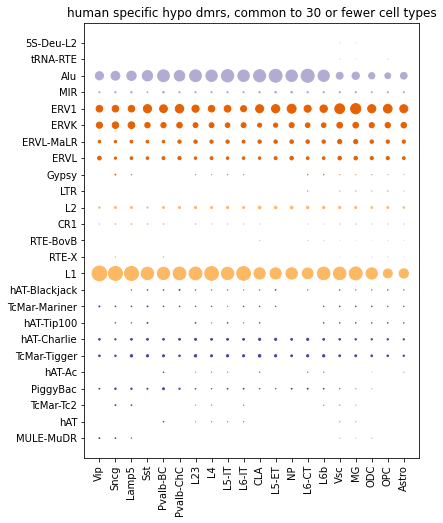

In [60]:
fig, ax = plt.subplots(figsize=(6, 8))
dotplot_colors(specific_te_hypo.values.T,
               colors=np.array([colors_hypo]*20).flatten(),
               x_names=cell_order,
               y_names=specific_te_hypo.index, max_size=500,
               ax=ax)
ax.set_title('human specific hypo dmrs, common to {} or fewer cell types'.format(n))

AttributeError: 'list' object has no attribute 'values'

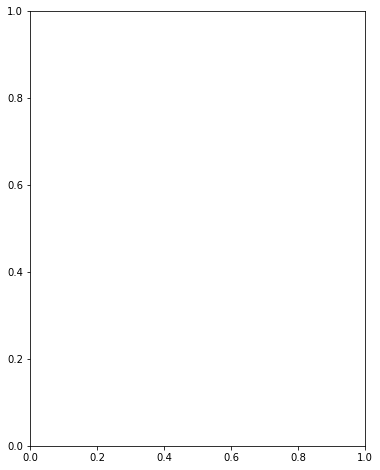

In [61]:
fig, ax = plt.subplots(figsize=(6, 8))
dotplot_colors(specific_te_hyper.values.T,
               colors=np.array([colors_hyper]*20).flatten(),
               x_names=specific_te_hyper.columns,
               y_names=specific_te_hyper.index, max_size=300,
               ax=ax)
ax.set_title('human specific hyper dmrs, common to less than {} cell types'.format(n))

In [ ]:
specific_te_hypo.max()

In [ ]:
n=3

In [ ]:
specific_te_hyper = []
specific_te_hypo = []
for ct in cell_types:
    specific_te_hyper.append((dmrs[((dmrs.te_annot=='LTR')
                                    &  hyper_assign[ct]) 
                                   & dmrs['human_specific'] 
                                   & (hyper_assign['multi_activity'] <= n)].homer_annot.value_counts()/(hyper_assign[ct] 
                                                                                                        & dmrs['human_specific'] & (hyper_assign['multi_activity'] <= n)).sum()).rename(ct))
    specific_te_hypo.append((dmrs[((dmrs.te_annot=='LTR') &  hypo_assign[ct])
                                  & dmrs['human_specific'] &
                                  (hypo_assign['multi_activity'] <= n)].homer_annot.value_counts()/(hypo_assign[ct] 
                                                                                                    & dmrs['human_specific'] & (hypo_assign['multi_activity'] <= n)).sum()).rename(ct))

In [ ]:
specific_te_hyper=pd.concat(specific_te_hyper, axis=1).fillna(0)
specific_te_hypo=pd.concat(specific_te_hypo, axis=1).fillna(0)

In [ ]:
specific_te_hypo.index

In [ ]:
use_hypo = specific_te_hypo.index[np.sum(specific_te_hypo > .02, axis=1) >= 1]

In [ ]:
# use_hyper = np.sum(specific_te_hyper > .01, axis=1) >= 1

In [ ]:
use =  use_hypo

In [ ]:
specific_te_hyper = specific_te_hyper.loc[use]

In [ ]:
specific_te_hypo = specific_te_hypo.loc[use]

In [ ]:
{ ct : hypo_assign[ct].sum() for ct in cell_types}

In [ ]:
fig, ax = plt.subplots(figsize=(6, 8))
dotplot_colors(specific_te_hyper.values.T,
               x_names=specific_te_hyper.columns,
               y_names=specific_te_hyper.index, max_size=300,
               ax=ax)

ax.set_title('human specific hyper dmrs, common to {} or fewer cell types, largest={:.2f}'.format(n, specific_te_hyper.max().max()))

In [ ]:
specific_te_hypo = specific_te_hypo.loc[use]

In [ ]:
?str.format

In [ ]:
fig, ax = plt.subplots(figsize=(6, 8))
dotplot_colors(specific_te_hypo.values.T,
               x_names=specific_te_hypo.columns,
               y_names=specific_te_hypo.index, max_size=1000,
               ax=ax)
ax.set_title('human specific hypo dmrs, common to {} or fewer cell types, largest={:.3f}'.format(n, specific_te_hypo.max().max()))

In [ ]:
specific_te_hypo.max()

In [ ]:
{ct : (hypo_assign[ct] & dmrs['human_specific']).sum() for ct in cell_types} 

In [ ]:
specific_te_hyper = []
specific_te_hypo = []
for ct in hypo_assign['multi_activity'].unique():
    specific_te_hyper.append((dmrs[((dmrs.te_annot=='LTR')  &  (hyper_assign.multi_activity == ct))].simple_annot.value_counts()/((hyper_assign.multi_activity == ct) & dmrs['human_specific']).sum()).rename(ct))
    specific_te_hypo.append((dmrs[((dmrs.te_annot=='LTR') &  (hypo_assign.multi_activity == ct))].simple_annot.value_counts()/((hypo_assign.multi_activity == ct) & dmrs['human_specific']).sum()).rename(ct))

In [ ]:
specific_te_hyper=pd.concat(specific_te_hyper, axis=1).fillna(0)
specific_te_hypo=pd.concat(specific_te_hypo, axis=1).fillna(0)

In [ ]:
use_hypo = np.sum(specific_te_hypo > .05, axis=1) >= 1

In [ ]:
use_hyper = np.sum(specific_te_hyper > .01, axis=1) >= 1

In [ ]:
use = use_hyper | use_hypo

In [ ]:
specific_te_hypo = specific_te_hypo.loc[use]

In [ ]:
specific_te_hyper = specific_te_hypo.loc[use]

In [ ]:
fig, ax = plt.subplots(figsize=(6, 8))
dotplot_colors(specific_te_hypo.values.T,
               x_names=specific_te_hypo.columns,
               y_names=specific_te_hypo.index, max_size=1000,
               ax=ax)

In [ ]:
fig, ax = plt.subplots(figsize=(6, 8))
dotplot_colors(specific_te_hyper.values.T,
               x_names=specific_te_hyper.columns,
               y_names=specific_te_hyper.index, max_size=300,
               ax=ax)

In [ ]:
(hypo_assign['Pvalb-BC'] & hypo_assign['Sst'] & dmrs['human_specific']).sum()

In [ ]:
{ ct : (hypo_assign[ct] & dmrs['human_specific']).sum()/hypo_assign[ct].sum() for ct in cell_types}

In [ ]:
{ ct : (hypo_assign[ct] & dmrs['human_specific'] & (hypo_assign['multi_activity'] < 3)).sum() for ct in cell_types}

In [ ]:
{ ct : (hypo_assign[ct] ).sum() for ct in cell_types}

In [ ]:
{ ct : (hypo_assign[ct] & dmrs['human_specific']).sum()/hypo_assign[ct].sum() for ct in cell_types}

In [ ]:
{ ct : (hyper_assign[ct] & dmrs['human_specific']).sum()/hyper_assign[ct].sum() for ct in cell_types}